In [45]:
import sklearn
import pandas as pd
import numpy as np

In [46]:
dat = pd.read_csv("https://www.dropbox.com/scl/fi/yf8t1x0uvrln93dzi6xd8/housing_small.csv?rlkey=uen32y937kqarrjra0v6jaez4&dl=1")

In [47]:
y = dat['SalePrice']
X = dat[['Gr Liv Area', 'Bedroom AbvGr', 'Neighborhood_NAmes', 'Neighborhood_NWAmes']]

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [50]:
print(len(X_train))

74


In [51]:
print(len(X_test))

25


In [52]:
print(len(y_train))

74


In [53]:
print(len(y_test))

25


In [54]:
lr_fit = lr.fit(X_train, y_train)
dt_fit = dt.fit(X_train, y_train)
knn_fit = knn.fit(X_train, y_train)

In [55]:
lr_fit.coef_

array([    79.64030748, -10557.22541801,  -6672.97170256,   6672.97170256])

In [56]:
y_pred_knn = knn_fit.predict(X_test)
y_pred_lr = lr_fit.predict(X_test)
y_pred_dt = dt_fit.predict(X_test)

In [61]:
print(y_pred_lr)

[150227.6437028  121796.0539316  138998.36034779 240380.47177283
 150332.45013424 161421.99158067 140670.80680492 145051.02371645
 226489.43001898 124185.26315607 146882.75078854 163493.94680043
 165438.94243193 113194.90072351 160501.24336803 155926.81036438
 222825.97587479 133264.25820906 260440.05990519 141945.05172464
 133627.52426933 140431.88588247 234568.03655184 113194.90072351
 144777.16731685]


In [58]:
print(y_test)

1     172000
50    122500
44    142000
29    197600
27     84900
11    184000
22    159000
45    167500
88    158000
90    148500
58    162000
20    143000
32    153000
10    115000
57     97500
33    132000
3     210000
64    160000
59    242000
21    128950
51    119000
46    108538
71    260000
95    120500
34    178000
Name: SalePrice, dtype: int64


In [64]:
np.array_equal(y_pred_dt, y_test)

False

In [65]:
np.sum(y_pred_dt == y_test)

np.int64(0)

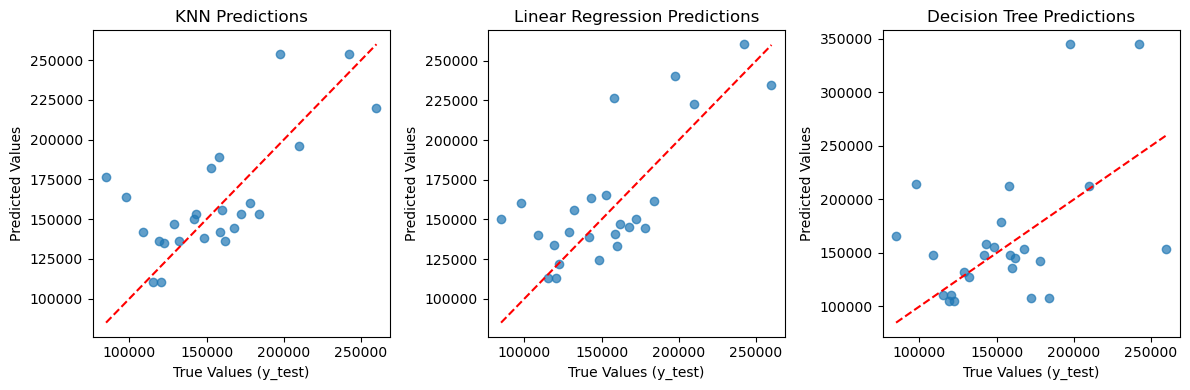

In [67]:
import matplotlib.pyplot as plt

# Create a scatter plot for each model
plt.figure(figsize=(12, 4))

# --- KNN ---
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_knn, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("KNN Predictions")
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values")

# --- Linear Regression ---
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression Predictions")
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values")

# --- Decision Tree ---
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_dt, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Decision Tree Predictions")
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


In [68]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_lr))
print(mean_squared_error(y_test, y_pred_dt))

1006679845.76
919931064.8739852
3285685458.3155556


In [ ]:
final_model = lr.fit(X, y)
final_model.coef_
#'Gr Liv Area', 'Bedroom AbvGr', 'Neighborhood_NAmes', 'Neighborhood_NWAmes'

array([    74.37717581, -13083.50151923,  -7484.17760684,   7484.17760684])